In [1]:
import pandas as pd


In [2]:
data_set= 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipotle = pd.read_csv(data_set, sep="\t")

In [3]:
print(chipotle.head(10))

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

In [4]:
print(len(chipotle))
print(chipotle.shape[0])

4622
4622


In [5]:
print(chipotle.shape[1])

5


In [6]:
most_ordered = chipotle.groupby('item_name')['quantity'].sum().idxmax()
print(most_ordered)

Chicken Bowl


In [7]:
item_data = chipotle[chipotle['item_name'] == most_ordered]

times_ordered = item_data.shape[0]
total_quantity = item_data['quantity'].sum()

print(times_ordered)
print(total_quantity)

726
761


In [8]:
print(chipotle['item_price'].dtype)

object


In [9]:
chipotle['item_price'] = (
    chipotle['item_price']
    .astype(str)
    .str.replace('$', '', regex=False)
    .astype(float)
)
revenue = (chipotle['quantity'] * chipotle['item_price']).sum()
print(revenue)

39237.02


In [10]:
num_orders = chipotle['order_id'].nunique()
print(num_orders)

1834


In [11]:
order_revenue = (
    chipotle
    .assign(total=chipotle['quantity'] * chipotle['item_price'])
    .groupby('order_id')['total']
    .sum()
)

avg_revenue = order_revenue.mean()
print(avg_revenue)


21.39423118865867


In [12]:
count_expensive = chipotle[chipotle['item_price'] > 8].shape[0]
print(count_expensive)


2888


In [13]:
items_price_df = chipotle[['item_name', 'item_price']]
print(items_price_df.head())


                               item_name  item_price
0           Chips and Fresh Tomato Salsa        2.39
1                                   Izze        3.39
2                       Nantucket Nectar        3.39
3  Chips and Tomatillo-Green Chili Salsa        2.39
4                           Chicken Bowl       16.98


In [14]:
sorted_df = items_price_df.sort_values(by='item_name')
print(sorted_df.head())


              item_name  item_price
3389  6 Pack Soft Drink       12.98
341   6 Pack Soft Drink        6.49
1849  6 Pack Soft Drink        6.49
1860  6 Pack Soft Drink        6.49
2713  6 Pack Soft Drink        6.49


In [15]:
max_price = chipotle['item_price'].max()
quantity_most_expensive = chipotle[
    chipotle['item_price'] == max_price
]['quantity'].sum()

print(quantity_most_expensive)


15


In [16]:
count_canned_soda = chipotle[
    (chipotle['item_name'] == 'Canned Soda') &
    (chipotle['quantity'] > 1)
].shape[0]

print(count_canned_soda)

20


In [17]:
veggie_salad_orders = chipotle[
    chipotle['item_name'] == 'Veggie Salad Bowl'
].shape[0]

print(veggie_salad_orders)


18


In [18]:
import numpy as np

chipotle.loc[:2, 'quantity'] = np.nan


In [19]:
chipotle.loc[3:4, 'item_price'] = np.nan

In [20]:
chipotle['quantity'] = chipotle['quantity'].fillna(2)
chipotle['item_price'] = chipotle['item_price'].fillna(7)

In [21]:
import numpy as np

random_indices = np.random.choice(
    chipotle.shape[0],
    size=10,
    replace=False
)

print(random_indices)

[ 421  985 4016   72   92 1727 3907 3645  229  603]


In [22]:
chipotle.loc[random_indices, :] = np.nan

In [23]:
total_missing = chipotle.isna().sum().sum()
print(total_missing)


1290


In [24]:
chipotle = chipotle.dropna()


In [25]:
chipotle = chipotle.reset_index(drop=True)


<Axes: xlabel='item_name'>

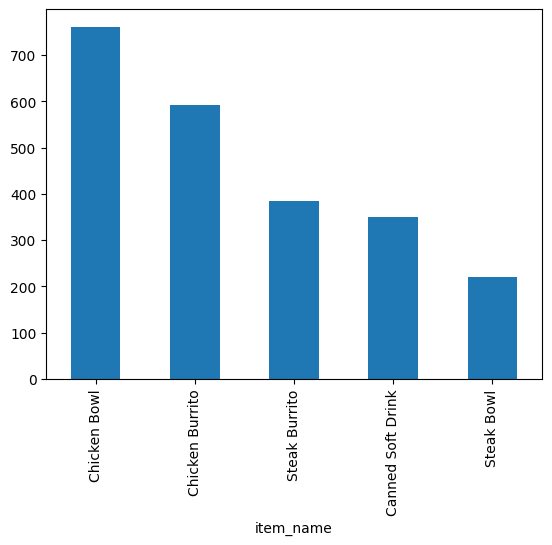

In [26]:
top5 = (
    chipotle
    .groupby('item_name')['quantity']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
top5.plot(kind='bar')


<Axes: xlabel='total_price', ylabel='total_items'>

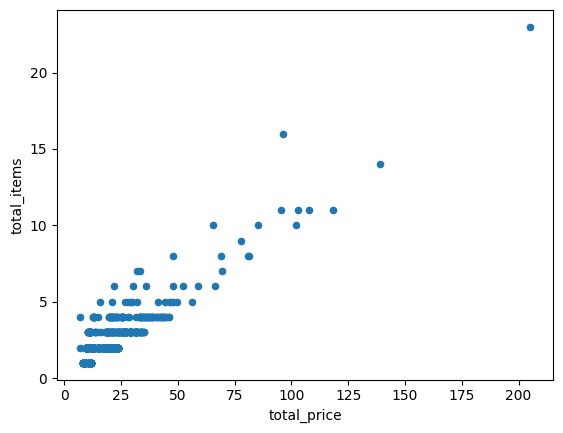

In [27]:
order_summary = chipotle.groupby('order_id').agg(
    total_items=('quantity', 'sum'),
    total_price=('item_price', 'sum')
)

order_summary.plot(
    kind='scatter',
    x='total_price',
    y='total_items'
)
